The sorting algorithms below were implemented by me in CSE331

#### The following imports must be made to run any code below

In [7]:
from typing import TypeVar, List, Callable, Dict
T = TypeVar("T")  # represents generic type
import timeit
from random import randint
import random
import matplotlib.pyplot as plt
from timeit import timeit
import numpy as np

### Merge Sort

In [8]:
def merge(d1, d2, data,
          comparator: Callable[[T, T], bool] = lambda x, y: x <= y) -> int:
    """
    :param d1: first half of the list
    :param d2: last half of the list
    :param data: the whole list
    :param comparator: How to sort the list
    return: the number of inversions
    """
    val = i = j = 0
    while i + j < len(data):
        if j == len(d2) or (i < len(d1) and comparator(d1[i], d2[j])):
            data[i + j] = d1[i]
            i += 1
            val += j
        else:
            data[i + j] = d2[j]
            j += 1
    return val

def merge_sort(data: List[T], threshold: int = 0,
               comparator: Callable[[T, T], bool] = lambda x, y: x <= y) -> int:
    """
    :param data: List of items to be sorted.
    :param threshold: int representing the size of the data at which insertion sort should be used.
    :param comparator: compares 2 variables and returns true if the first is larger else false
    return: int representing inversion count, else 0 if threshold > 0.
    """
    val = 0
    length = len(data)
    if length < 2:
        return 0

    mid = length // 2
    data1 = data[0:mid]
    data2 = data[mid:length]
    val += merge_sort(data1, threshold, comparator)
    val += merge_sort(data2, threshold, comparator)

    val += merge(data1, data2, data, comparator)

    if threshold:
        return 0
    return val

### Insertion Sort

In [9]:
def insertion_sort(data: List[T],
                   comparator: Callable[[T, T], bool] = lambda x, y: x <= y) -> None:
    """
    :param data: unsorted list
    :param comparator: compares 2 variables and returns true if the first is larger else false
    return: int representing inversion count, else 0 if threshold > 0.
    """
    for i in range(1, len(data)):
        j = i
        while (j > 0) and comparator(data[j], data[j - 1]):
            data[j], data[j - 1] = data[j - 1], data[j]
            j -= 1

### Hypothesis

Given that the average run time of merge sort is O(nlog(n)) and the average run time of insertion sort is O(n^2) merge sort should always perform better than insertion sort unless the list is already sorted, but that isn't usually the case. Merge sort also has a space complexity of O(n), which compared to insertion sort's O(1), can have a negative impact on performance. 

So doing some math we want to see where merge_sort > insertion_sort so,
nlog(n) > n^2
log(n) > n
log(n) - n > 0
1 > n^3/log(n)

I assume that merge sort will perform worse for any list with under 20 items.

### Methods

To generate the sorting times I created lists from sizes 1 to 100 with randomized values from -100 to 100 using the random library with a constant seed. Both merge and insertion sort were passed unique copies of the same list to sort and their respective run times were calculated using the python library timeit. There is only one time calculated for each algorithm per list size, but accuracy could be improved by averaging a number of trials per list length. The values are then added to a list to be used for plotting.

### Code to Generate the Sorting Data

In [10]:
random.seed(331)

merge_sort_times = []
insertion_sort_times = []

for number_of_items in range(1, 100 + 1):
    sample_list = [randint(-100,100) for i in range(number_of_items)]
    
    merge_list = sample_list[:]
    insertion_list = sample_list[:]
    
    merge_sort_times.append(
        timeit('merge_sort(merge_list)',
               number=1, globals=globals()))
    
    insertion_sort_times.append(
        timeit('insertion_sort(insertion_list)',
               number=1, globals=globals()))

### Code to plot the sorting times

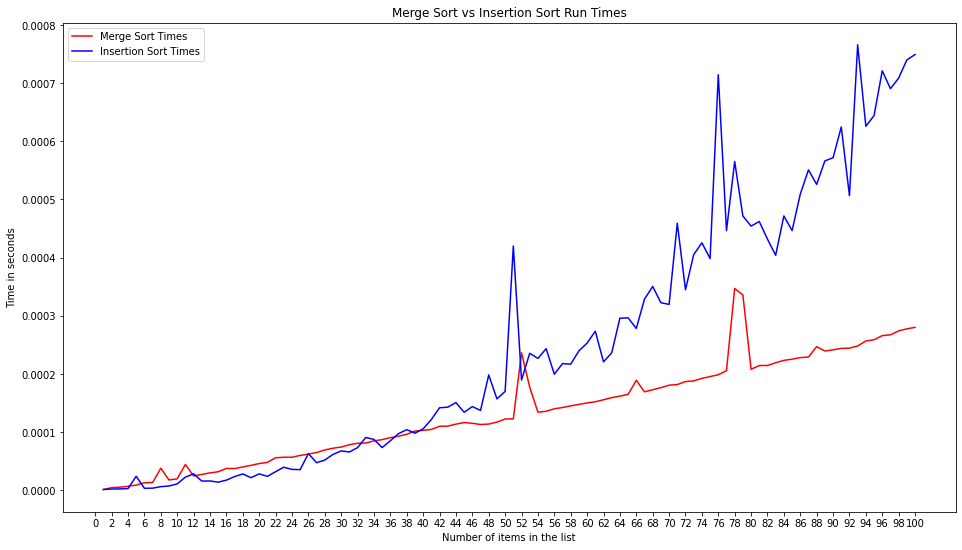

In [11]:
plt.plot([i+1 for i in range(len(merge_sort_times))],
        merge_sort_times,
        label="Merge Sort Times",
        color="red")
plt.plot([i+1 for i in range(len(insertion_sort_times))],
        insertion_sort_times,
        label="Insertion Sort Times",
        color="blue")

plt.legend()
plt.xticks(np.arange(0, 100+1, 2))
plt.title("Merge Sort vs Insertion Sort Run Times")
plt.ylabel("Time in seconds")
plt.xlabel("Number of items in the list")
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

### Results

Given the plot above, the time taken for insertion sort surpasses merge sort around the list length with 40 elements. The y axis is the time the sorting algorithm took in seconds and the x axis shows the number of elements in the lists. Merge sort is shown in red and increases slowly, while insertion sort in shown in blue, increases more rapidly. This is around what would be expected for the two algorithms, however, both show areas of performance outside what is expected. 

### Discussion

I found that using smaller sample sizes gave the most readable graph and that anything over 100 would only show the gap in performance increasing with insertion sort taking longer. Given the difference in time complexities, I wasn't surprised by the outcome, however there large jumps in performance for both insertion and merge sort. I assume this could be caused by the generated list being close to or completely reversed. I didn't find any challenges when collecting this data

### Conclusions

Under the conditions tested, merge sort produces a faster algorithm for n > 40, while insertion sort is faster for n < 40.